In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
feature_data = pd.read_csv('linearX.csv')
target_data = pd.read_csv('linearY.csv')


In [5]:
feature_data['target_column'] = target_data['0.99523']



In [7]:
def scale_min_max(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)


In [9]:
feature_data['scaled_column'] = scale_min_max(feature_data['9.1'])
feature_data['target_column'] = scale_min_max(feature_data['target_column'])
feature_data.rename(columns={'target_column': 'target', 'scaled_column': 'feature'}, inplace=True)


In [11]:
X_features = feature_data.drop('target', axis=1)
y_target = feature_data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




(79, 2) (20, 2) (79,) (20,)


In [19]:
import numpy as np

class GradientDescent:
    def __init__(self, learning_rate, epochs):  # Fixed the constructor method
        self.slope = 0
        self.intercept = 1
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.cost_history = []
    
    def fit(self, X_train, y_train):
        X_train = np.array(X_train).flatten()
        y_train = np.array(y_train)
        
        for epoch in range(self.epochs):
            y_pred = self.slope * X_train + self.intercept
            slope_gradient = (-2 / len(X_train)) * np.sum((y_train - y_pred) * X_train)
            intercept_gradient = (-2 / len(X_train)) * np.sum(y_train - y_pred)
            
            self.slope -= self.learning_rate * slope_gradient
            self.intercept -= self.learning_rate * intercept_gradient
            
            cost = (1 / len(X_train)) * np.sum((y_train - y_pred) ** 2)
            self.cost_history.append(cost)
        
        print("Intercept: ", self.intercept, "Slope: ", self.slope)
    
    def predict(self, X_test):  # Corrected indentation here
        X_test = np.array(X_test).flatten()
        return self.slope * X_test + self.intercept

# Example usage (you can replace these with your actual dataset)
X_train = [1, 2, 3, 4, 5]
y_train = [2, 4, 6, 8, 10]

# Initialize and train the model
gd_model = GradientDescent(learning_rate=0.05, epochs=1000)
gd_model.fit(X_train, y_train)

# Make predictions
X_test = [6, 7, 8]
y_predictions = gd_model.predict(X_test)
print("Predictions:", y_predictions)


Intercept:  5.6873535533097514e-08 Slope:  1.9999999842469427
Predictions: [11.99999996 13.99999995 15.99999993]


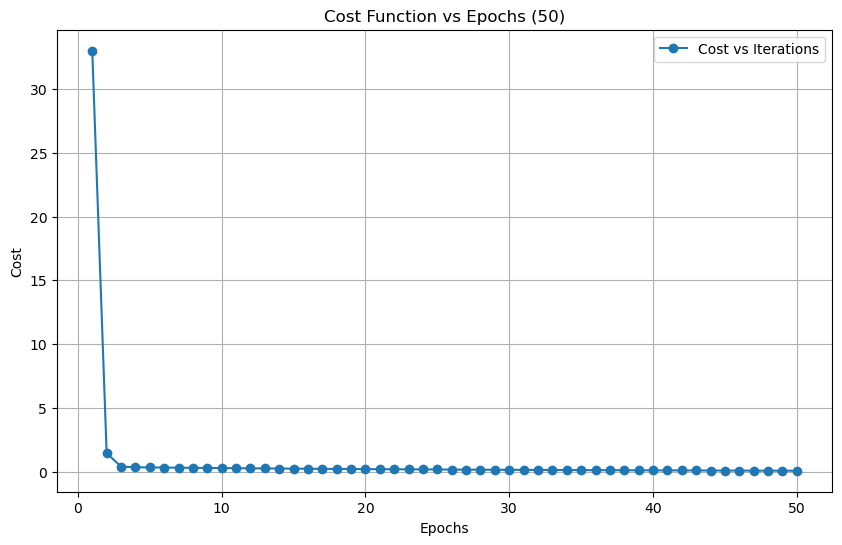

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), gd_model.cost_history[:50], marker='o', label='Cost vs Iterations')
plt.title("Cost Function vs Epochs (50)")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()



Intercept:  1.3253545071969646 Slope:  1.629720470494035
Intercept:  -2.398680843364328e+51 Slope:  -8.65999894185533e+51
Intercept:  -1.2980870393169602e+103 Slope:  -4.6865060927213855e+103


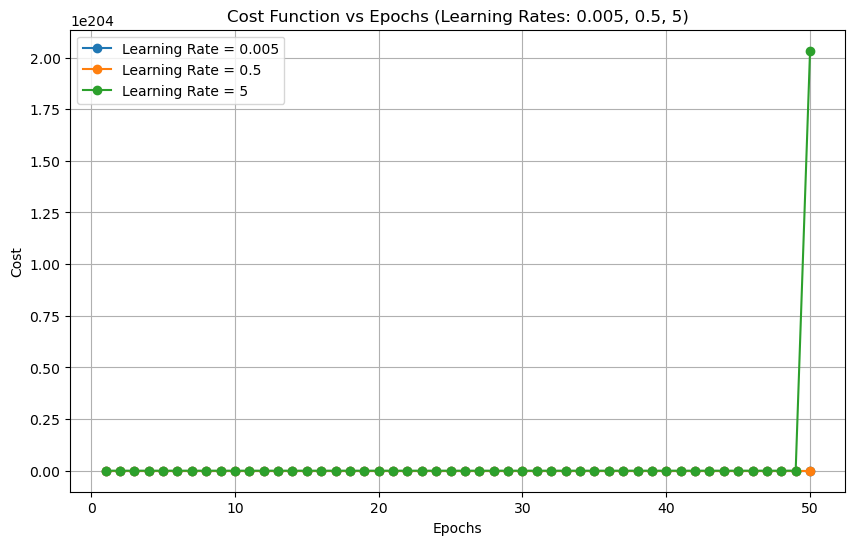

In [23]:
learning_rates = [0.005, 0.5, 5]
learning_rate_results = {}

for lr in learning_rates:
    temp_gd_model = GradientDescent(learning_rate=lr, epochs=50)
    temp_gd_model.fit(X_train, y_train)
    learning_rate_results[lr] = temp_gd_model.cost_history

# Plot cost vs iterations for different learning rates
plt.figure(figsize=(10, 6))
for lr, cost_history in learning_rate_results.items():
    plt.plot(range(1, 51), cost_history, marker='o', label=f"Learning Rate = {lr}")
plt.title("Cost Function vs Epochs (Learning Rates: 0.005, 0.5, 5)")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()


In [25]:
class MiniBatchGD(GradientDescent):
    def fit(self, X_train, y_train, batch_size=10):
        X_train = np.array(X_train).flatten()
        y_train = np.array(y_train)
        n = len(X_train)
        
        for epoch in range(self.epochs):
            for batch_start in range(0, n, batch_size):
                X_batch = X_train[batch_start:batch_start + batch_size]
                y_batch = y_train[batch_start:batch_start + batch_size]
                
                y_pred = self.slope * X_batch + self.intercept
                slope_grad = (-2 / len(X_batch)) * np.sum((y_batch - y_pred) * X_batch)
                intercept_grad = (-2 / len(X_batch)) * np.sum(y_batch - y_pred)
                
                self.slope -= self.learning_rate * slope_grad
                self.intercept -= self.learning_rate * intercept_grad
                
            cost = (1 / n) * np.sum((y_train - (self.slope * X_train + self.intercept)) ** 2)
            self.cost_history.append(cost)



In [27]:
mini_batch_gd = MiniBatchGD(learning_rate=0.5, epochs=50)
mini_batch_gd.fit(X_train, y_train, batch_size=10)

